## Midterm

In [1]:
#packages
import pandas as pd
import numpy as np

import random
import time
import datetime

import os
import requests
import json
from bs4 import BeautifulSoup
import boto3

from IPython.display import HTML, display
import matplotlib.pyplot as plt

## Task 0

In [8]:
path = "/Users/dominikaferkova/Desktop/IES/6 semester/Python/Midterm_solution/data/{}.csv"
ppg = pd.read_csv(path.format("PPG"))
psx = pd.read_csv(path.format("PSX"))
tap = pd.read_csv(path.format("TAP"))
trgp = pd.read_csv(path.format("TRGP"))
vtrs = pd.read_csv(path.format("VTRS"))

companies = [("ppg", ppg), ("psx", psx), ("tap", tap), ("trgp", trgp), ("vtrs", vtrs)]

In [11]:
ppg.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,name
0,2017-01-03,82.913,83.383,82.166,82.757,1358100,0.0,0.0,ppg
1,2017-01-04,83.157,84.729,83.087,84.512,1334500,0.0,0.0,ppg
2,2017-01-05,83.808,83.947,82.887,83.079,1661900,0.0,0.0,ppg
3,2017-01-06,83.209,83.530,82.792,83.052,1379800,0.0,0.0,ppg
4,2017-01-09,82.583,83.808,82.340,83.713,1454000,0.0,0.0,ppg


In [9]:
#add company name
for name, company in companies:
    company["name"] = name


In [40]:
df = pd.concat([ppg, psx, tap, trgp, vtrs]).reset_index()

In [41]:
df.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,name,log_return
0,0,2017-01-03,82.913,83.383,82.166,82.757,1358100,0.0,0.0,ppg,NaN
1,1,2017-01-04,83.157,84.729,83.087,84.512,1334500,0.0,0.0,ppg,0.020985
2,2,2017-01-05,83.808,83.947,82.887,83.079,1661900,0.0,0.0,ppg,-0.017102
3,3,2017-01-06,83.209,83.530,82.792,83.052,1379800,0.0,0.0,ppg,-0.000325
4,4,2017-01-09,82.583,83.808,82.340,83.713,1454000,0.0,0.0,ppg,0.007927


In [10]:
#to date
for name, company in companies:
    company["Date"] = pd.to_datetime(company["Date"], format = "%Y-%m-%d")

## Task 1

1. Is there a company that has no difference between the High and Low columns?
What does it mean for the stock's trading behavior on such days?


In [ ]:
#use the Close time series
for name,company in companies:
    if company["Low"].equals(company["High"]):
        print(name)
#it is not equal for any company

2. (1pt task) "What is the highest and lowest price (High) each company recorded?"

In [18]:
dic = {}
for name, company in companies:
    dic[name] = company["Close"].agg(["max", "min"])
pd.DataFrame(dic)

,ppg,psx,tap,trgp,vtrs
max,170.791,104.521,84.358,75.975,40.920
min,66.475,34.433,29.688,4.290,7.682


3. (1pt task) Calculate logarithmic returns from Close. For each company report on
its, min, max, mean, standard deviation, and skewness of the return distribution.

In [ ]:
#log returns
for name, company in companies:
    company["log_return"] = np.log(company["Close"] / company["Close"].shift(1))

ppg["log_return"]

0            NaN
1       0.020985
2      -0.017102
3      -0.000325
4       0.007927
          ...   
1505    0.006804
1506   -0.002367
1507   -0.017155
1508    0.016998
1509   -0.005240
Name: log_return, Length: 1510, dtype: float64

In [23]:
dic = {}
for name, company in companies:
    dic[name] = company["log_return"].agg(["min", "max", "mean", "std", "skew"])
pd.DataFrame(dic)

,ppg,psx,tap,trgp,vtrs
min,-0.133487,-0.172752,-0.167267,-0.753080,-0.278054
max,0.123751,0.200272,0.102843,0.300881,0.150160
mean,0.000251,0.000277,-0.000336,0.000364,-0.000790
std,0.018131,0.024421,0.019553,0.038678,0.025423
skew,-0.596299,-0.096548,-0.810894,-6.053933,-1.615192


4. When did each company record the second highest gain and second highest
loss for the day? (logarithmic loss). Hint: idxmax

In [35]:
ppg.iloc[ppg["log_return"].sort_values(ascending=True).index[1]]["Date"]
ppg["log_return"].sort_values(ascending=False)

810     0.123751
1475    0.089011
1078    0.083690
819     0.074262
457     0.058880
          ...   
809    -0.094934
445    -0.105979
806    -0.124890
804    -0.133487
0            NaN
Name: log_return, Length: 1510, dtype: float64

In [36]:
dic = {}
for name, company in companies:
    #minimum
    min_l = company.iloc[company["log_return"].sort_values(ascending=True).index[1]]["Date"]
    #maximum
    max_l = company.iloc[company["log_return"].sort_values(ascending=False).index[1]]["Date"]
    dic[name] = {"Date of min": min_l, "Date of max": max_l}

pd.DataFrame(dic)

,ppg,psx,tap,trgp,vtrs
Date of min,2020-03-18,2020-03-11,2020-04-30,2020-03-18,2019-05-07
Date of max,2022-11-10,2020-03-13,2018-10-31,2020-05-18,2018-11-06


5. What is the median calendar weekly volume for each company? Hint: check how
to resample pandas DF

In [43]:
df = pd.concat([ppg, psx, tap, trgp, vtrs]).reset_index()
df.groupby("name")["Volume"].rolling(7).median().groupby(level = 0).median().reset_index()

,name,Volume
0,ppg,1277100.0
1,psx,2680850.0
2,tap,1589000.0
3,trgp,1843500.0
4,vtrs,5884250.0


6. Which company recorded the lowest total return over the whole period?

In [68]:
#assuming that total return is sum(price) - prtice[0]
dic = {}
for name, company in companies:
    first = company["Close"][0]
    last = company["Close"].sum()
    total = last - first
    dic[name] = {"total":total}
returns = pd.DataFrame(dic).T.reset_index()

In [74]:
returns.iloc[returns["total"].idxmin()]["index"]

'vtrs'

7. Create a new column volume_class based on the volume column into
categories (e.g., "Low", "Medium", "High") and use tertile thresholds for the
classes.

8. A. Plot the log-returns of the companies (ideally in the same plot).
B. Show the log-return distribution of the companies (ideally in the same plot).

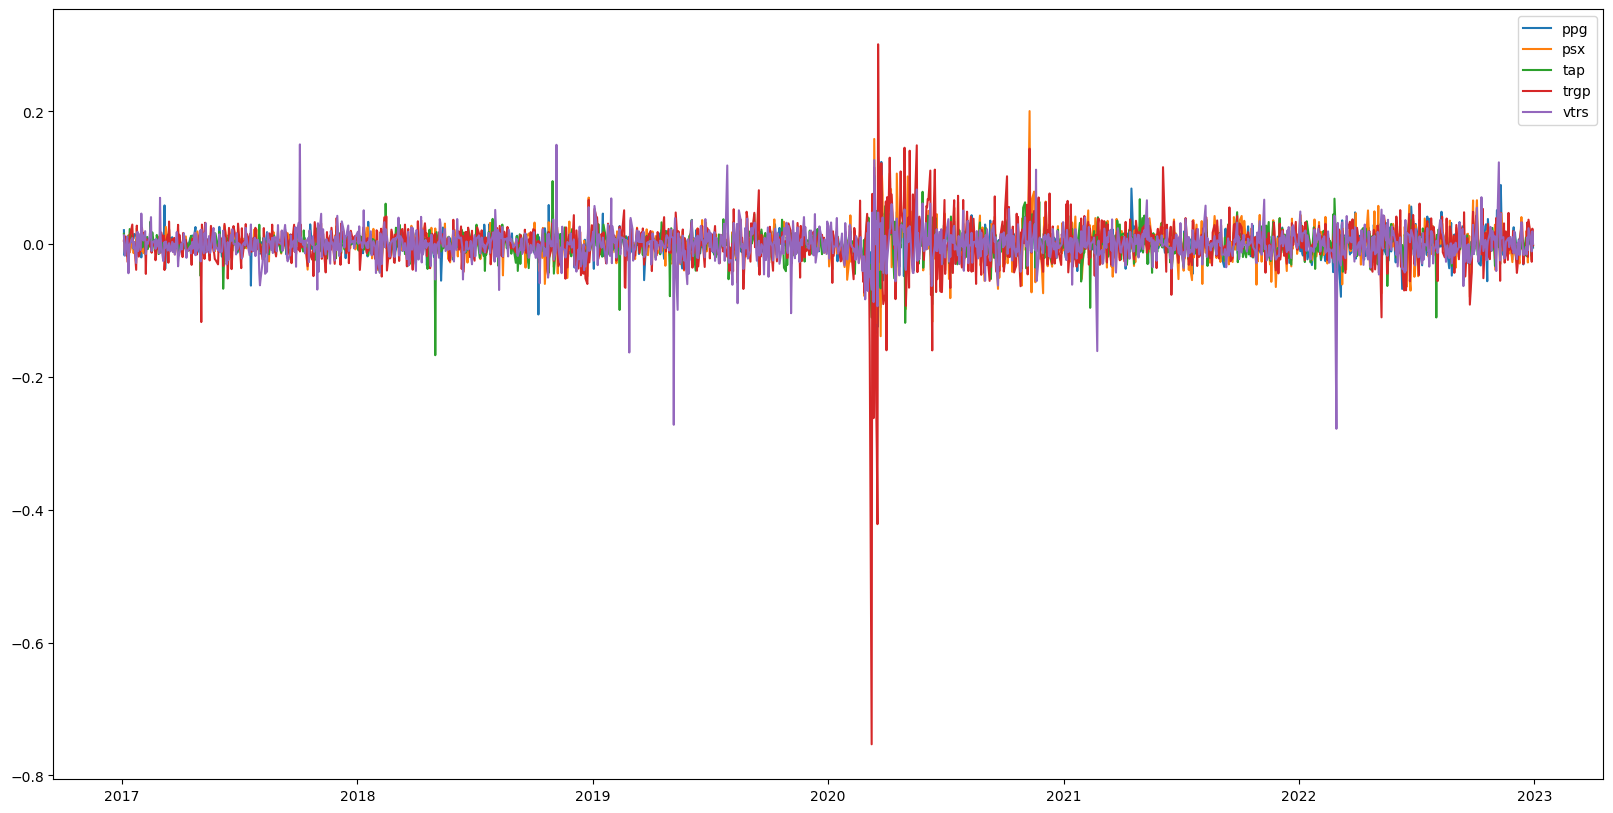

In [78]:
plt.subplots(figsize = (20, 10))

for name, company in companies:
    plt.plot(company["Date"], company["log_return"], label = name)


plt.legend()

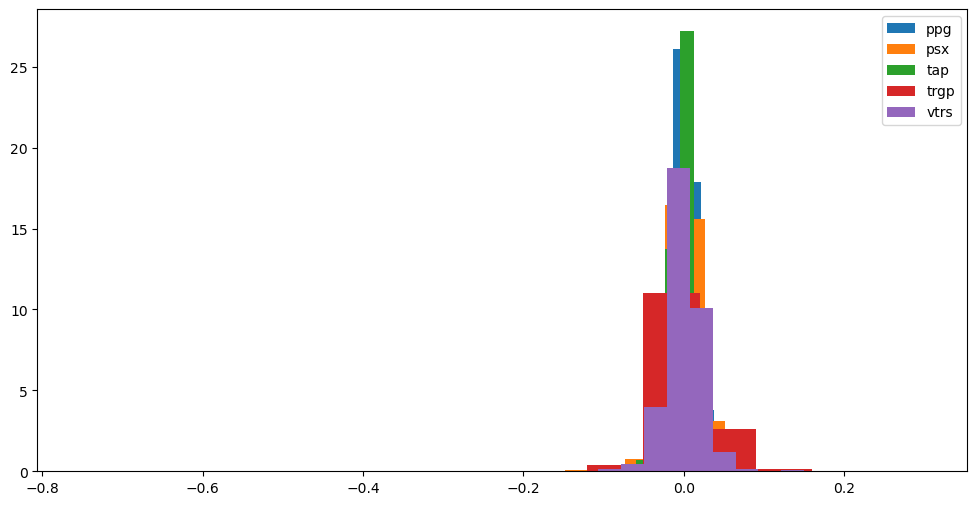

In [79]:
plt.subplots(figsize=(12, 6))

for name, group in df.groupby("name"):
    plt.hist(group["log_return"], bins = 15, density = True, label=name)

plt.legend()
plt.show()

## Task 2

In [92]:
url = "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv"
data = pd.read_csv(url)

In [93]:
data.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


1. (1pt task) Find out how many companies do not filled-in the date of inclusion
(column “included”) to S&P 500.

In [94]:
data["included"].isna().sum()

45

2. Delete the companies with no inclusion date and calculate which company is
the oldest/youngest constituent and tell us the median age of a constituent in
the sample. If you need to fix anything or make any assumptions, comment on
them in the code.
Hint: pd.to_datetime (some date column, dayfirst=True, errors='coerce')

In [95]:
data = data.dropna(subset = "included").reset_index()


data["Founded"] = pd.to_datetime(data["Founded"], dayfirst=True,errors='coerce')



In [96]:
today = datetime.datetime.today()
year = today.year


In [97]:
print(f"youndest is: {data.iloc[data['Founded'].idxmax()]["Symbol"]} and the oldest is: {data.iloc[data['Founded'].idxmin()]["Symbol"]}")

youndest is: WBD and the oldest is: BK


In [98]:
year - data["Founded"].dt.year.mean()

71.13064133016633

3. Describe the distribution of companies across sectors and create a plot that
demonstrates the proportionality of the sectors (i.e. pie plot, or something like
this)

               GICS_Sector  count
0   Information Technology     68
1              Industrials     66
2              Health Care     60
3               Financials     55
4   Consumer Discretionary     52
5         Consumer Staples     33
6              Real Estate     30
7                Materials     26
8   Communication Services     23
9                Utilities     23
10                  Energy     22


([<matplotlib.patches.Wedge at 0x13165fc20>,
 [Text(0.9824937293546878, 0.4946777453845257, 'Information Technology'),
  Text(0.2025607676993733, 1.0811887602953707, 'Industrials'),
  Text(-0.6908833028272606, 0.8559674420645309, 'Health Care'),
  Text(-1.0941825695808445, 0.11298010632611699, 'Financials'),
  Text(-0.8881413728612144, -0.6490030060116807, 'Consumer Discretionary'),
  Text(-0.38408928255840796, -1.0307644847508899, 'Consumer Staples'),
  Text(0.08291962850581176, -1.0968702453838641, 'Real Estate'),
  Text(0.4879268426565809, -0.985863781774734, 'Materials'),
  Text(0.7857791165518137, -0.7697734601758179, 'Communication Services'),
  Text(0.9858637303813442, -0.4879269464977112, 'Utilities'),
  Text(1.0874987680638741, -0.16536755866721908, 'Energy')])

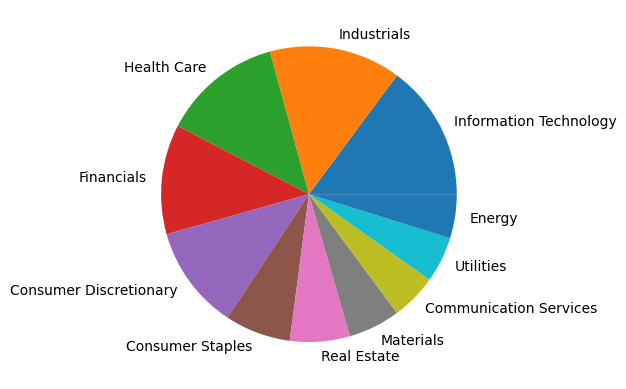

In [101]:
sectors = data["GICS_Sector"].value_counts().reset_index()
print(sectors)

plt.pie(sectors["count"], labels = sectors["GICS_Sector"])

4. Parse the “hq” column, extract the state of the hq and describe the distribution
of the states

In [103]:
data["State"] = data["hq"].apply(lambda x: x.split(", ")[-1])
states = data["State"].value_counts().reset_index()
print(states)

                                  State  count
0                            California     65
1                              New York     44
2                                 Texas     41
3                              Illinois     31
4                          Pennsylvania     19
5                         Massachusetts     18
6                                  Ohio     17
7                        North Carolina     16
8                               Georgia     16
9                            New Jersey     15
10                             Virginia     15
11                              Florida     14
12                            Minnesota     13
13                          Connecticut     13
14                           Washington     12
15                             Michigan     10
16                            Tennessee      7
17                             Colorado      7
18                              Ireland      7
19                             Missouri      6
20           

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, 'California'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Texas'),
  Text(3, 0, 'Illinois'),
  Text(4, 0, 'Pennsylvania'),
  Text(5, 0, 'Massachusetts'),
  Text(6, 0, 'Ohio'),
  Text(7, 0, 'North Carolina'),
  Text(8, 0, 'Georgia'),
  Text(9, 0, 'New Jersey'),
  Text(10, 0, 'Virginia'),
  Text(11, 0, 'Florida'),
  Text(12, 0, 'Minnesota'),
  Text(13, 0, 'Connecticut'),
  Text(14, 0, 'Washington'),
  Text(15, 0, 'Michigan'),
  Text(16, 0, 'Tennessee'),
  Text(17, 0, 'Colorado'),
  Text(18, 0, 'Ireland'),
  Text(19, 0, 'Missouri'),
  Text(20, 0, 'Indiana'),
  Text(21, 0, 'Wisconsin'),
  Text(22, 0, 'Arizona'),
  Text(23, 0, 'Maryland'),
  Text(24, 0, 'Nevada'),
  Text(25, 0, 'Oklahoma'),
  Text(26,

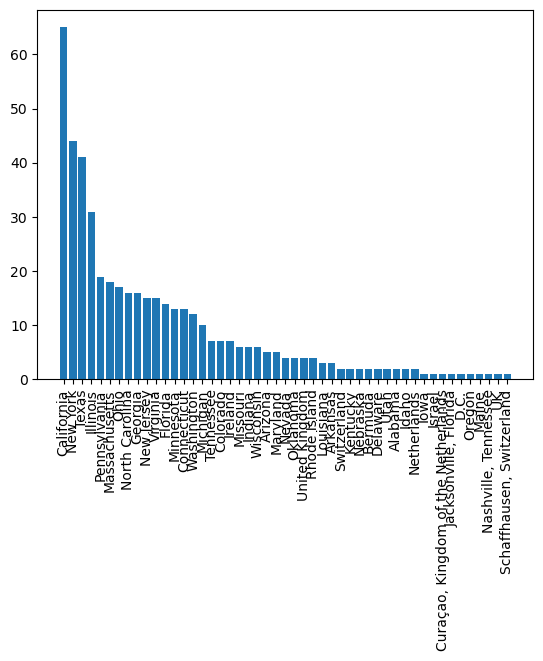

In [107]:
plt.plot(figsize = (30, 8))
plt.bar(states["State"], states["count"])
plt.xticks(rotation = 90)

5. Join the dataset with this one: https://ies-fsv.s3.eu-central-
1.amazonaws.com/companies/companies_subindustry.csv

And join the two datasets based on an appropriate key. Report on distribution of
subindustries for the “Health Care” GICS sector.

In [110]:
url2 = "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv"
data2 = pd.read_csv(url2)
data2.head()

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment


In [112]:
merged = data.merge(data2, how = "outer", on = "Symbol")
merged.head()

,index,Symbol,Security,GICS_Sector,hq,included,Founded,State,subindustry
0,13.0,A,Agilent Technologies,Health Care,"Santa Clara, California",05.06.2000,1999-01-01,California,Health Care Equipment
1,30.0,AAL,American Airlines Group,Industrials,"Fort Worth, Texas",23.03.2015,1934-01-01,Texas,Airlines
2,10.0,AAP,Advance Auto Parts,Consumer Discretionary,"Raleigh, North Carolina",09.07.2015,1932-01-01,North Carolina,Automotive Retail
3,45.0,AAPL,Apple Inc.,Information Technology,"Cupertino, California",30.11.1982,1977-01-01,California,"Technology Hardware, Storage & Peripherals"
4,3.0,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,NaT,Illinois,Pharmaceuticals


In [114]:
counts = merged.loc[merged["GICS_Sector"] == "Health Care", "subindustry"].value_counts().reset_index()
counts

,subindustry,count
0,Health Care Equipment,18
1,Pharmaceuticals,9
2,Biotechnology,7
3,Life Sciences Tools & Services,7
4,Managed Health Care,5
5,Health Care Distributors,4
6,Health Care Supplies,4
7,Health Care Services,3
8,Health Care Facilities,3


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Health Care Equipment'),
  Text(1, 0, 'Pharmaceuticals'),
  Text(2, 0, 'Biotechnology'),
  Text(3, 0, 'Life Sciences Tools & Services'),
  Text(4, 0, 'Managed Health Care'),
  Text(5, 0, 'Health Care Distributors'),
  Text(6, 0, 'Health Care Supplies'),
  Text(7, 0, 'Health Care Services'),
  Text(8, 0, 'Health Care Facilities')])

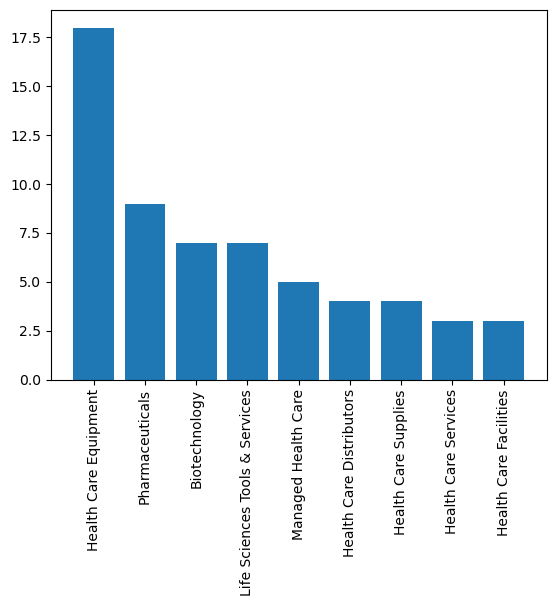

In [116]:
plt.plot(figsize = (20, 8))
plt.bar(counts["subindustry"], counts["count"])
plt.xticks(rotation = 90)